In [ ]:
from datascience import *
import numpy as np
import pandas as pd
from scipy import stats
from google.colab import files
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
file = files.upload()

Saving friend_movies.csv to friend_movies.csv


In [ ]:
movies = pd.read_csv('movies.csv')

In [ ]:
movies

,Title,Year,Rating,Genre,# Words,she,decid,talk,wit,razor,...,eight,morgu,comin,style,cadet,uh,uhuh,earn,tini,volunt
0,10 things i hate about you,1999,6.9,comedy,5341,0.006167,0.000597,0.001591,0.000199,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000597,0.0,0.000000,0.0,0.0
1,sister act,1992,5.9,comedy,7401,0.009293,0.000000,0.001971,0.000563,0.0,...,0.000000,0.000000,0.000000,0.000141,0.0,0.000000,0.0,0.000000,0.0,0.0
2,the boondock saints,1999,7.8,thriller,5705,0.002246,0.000561,0.002433,0.000374,0.0,...,0.000749,0.000000,0.000374,0.000000,0.0,0.001310,0.0,0.000187,0.0,0.0
3,mystery men,1999,5.9,comedy,3144,0.003308,0.000000,0.001985,0.000000,0.0,...,0.000331,0.000000,0.000000,0.000662,0.0,0.000662,0.0,0.000000,0.0,0.0
4,blade,1998,7.0,thriller,2886,0.001098,0.000000,0.001098,0.000000,0.0,...,0.000000,0.000366,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,storytelling,2001,6.7,comedy,3337,0.000947,0.000000,0.002840,0.000000,0.0,...,0.000631,0.000000,0.000000,0.000000,0.0,0.001578,0.0,0.000000,0.0,0.0
329,halloween h20: 20 years later,1998,5.4,thriller,1808,0.003497,0.000000,0.001748,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
330,gone in sixty seconds,2000,6.0,thriller,5644,0.003217,0.000000,0.000757,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000189,0.0,0.000189,0.0,0.000000,0.0,0.0
331,the butterfly effect,2004,7.8,thriller,4950,0.000635,0.000000,0.001058,0.000000,0.0,...,0.000212,0.000000,0.000000,0.000000,0.0,0.000635,0.0,0.000000,0.0,0.0


In [ ]:
movies[movies['Title'] == 'runaway bride']

,Title,Year,Rating,Genre,# Words,she,decid,talk,wit,razor,...,eight,morgu,comin,style,cadet,uh,uhuh,earn,tini,volunt
64,runaway bride,1999,5.2,comedy,4895,0.007236,0.0,0.002554,0.000213,0.0,...,0.000851,0.0,0.0,0.0,0.0,0.000851,0.0,0.0,0.0,0.0


In [ ]:
movies[movies['Title'] == 'runaway bride']['it']

,it
64,0.023409


In [ ]:
movies[movies['Title'] == 'runaway bride']['it'].iloc[0] * movies[movies['Title'] == 'runaway bride']['# Words'].iloc[0]

114.58821025750206

In [ ]:
stem = pd.read_csv('stem.csv')

In [ ]:
vocab_table = stem.groupby('Stem')['Word'].apply(list).reset_index()

In [ ]:
stem

,Stem,Word
0,sowel,sowell
1,everybodyit,everybodyit
2,uabortu,uabortu
3,wood,woods
4,spider,spiders
...,...,...
40048,hmnn,hmnn
40049,repertoir,repertoire
40050,rot,rotting
40051,expand,expands


In [ ]:
vocab_table

,Stem,Word
0,0,[0]
1,007,"[007, 007s]"
2,007:,[007:]
3,009843,[009843]
4,0100,[0100]
...,...,...
29192,zunding,[zundingers]
29193,zurich,[zurich]
29194,zuzu,"[zuzus, zuzu]"
29195,zydowski,"[zydowskis, zydowski]"


In [ ]:
for _, row in vocab_table.iterrows():
  if 'elements' in row['Word']:
    print(row['Stem'])

element


In [ ]:
most_stem = vocab_table['Stem'].iloc[0]
most_stem_size = len(vocab_table['Word'].iloc[0])
for _, row in vocab_table.iterrows():
  if len(row['Word']) > most_stem_size:
    most_stem = row['Stem']
    most_stem_size = len(row['Word'])
most_stem

'gener'

In [ ]:
longest_uncut = ''
vocab_table.sort_values(by='Stem', inplace=True, ascending=False)
for _, row in vocab_table.iterrows():
  for word in row['Word']:
    if word == row['Stem']:
      if len(word) > len(longest_uncut):
        longest_uncut = word
longest_uncut

'iworkforacovertvaticanhumanitarian'

In [ ]:
count_single_stems = 0
words = dict()
for _, row in vocab_table.iterrows():
  if len(row['Word']) == 1:
    count_single_stems += 1

count_single_stems

22594

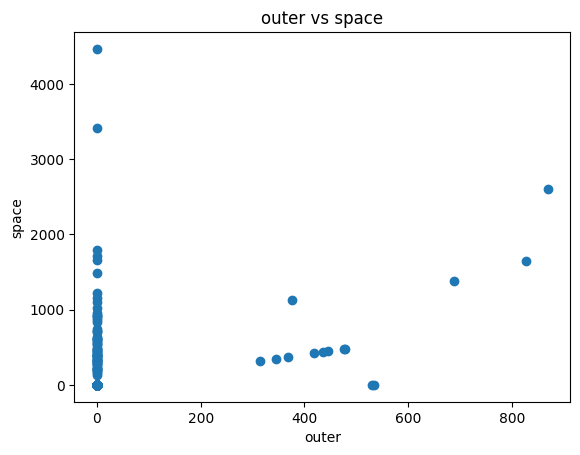

In [ ]:
total_words = movies['# Words'].sum()
total_space = movies['space'] * total_words
total_outer = movies['outer'] * total_words

plt.scatter(total_outer, total_space)
plt.title('outer vs space')
plt.xlabel('outer')
plt.ylabel('space')
plt.show()

In [ ]:
coeff = stats.linregress(total_space, total_outer)
coeff.rvalue

0.31942607876895907

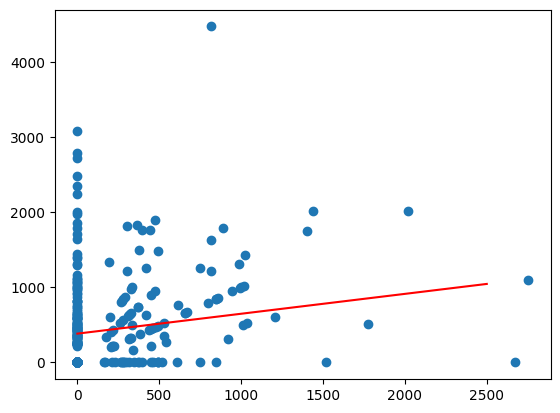

In [ ]:
total_laugh = movies['laugh'] * total_words
total_happi = movies['happi'] * total_words
coeff = stats.linregress(total_laugh, total_happi)
x = np.linspace(0, 2500)
y = x * coeff.rvalue + coeff.intercept

plt.scatter(total_laugh, total_happi)
plt.plot(x, y, color='red')
plt.show()

In [ ]:
coeff = stats.linregress(total_laugh, total_happi)
coeff

LinregressResult(slope=0.44023921891586693, intercept=383.82055652301631, rvalue=0.26457396127092153, pvalue=9.7107271460333884e-07, stderr=0.08820013532109669, intercept_stderr=36.677027757255701)

In [ ]:
training_proportion = 17/20

num_movies = len(movies)
num_train = int(num_movies * training_proportion)
num_test = num_movies - num_train

train_movies = movies.take(list(np.arange(num_train)))
test_movies = movies.take(list(np.arange(num_train, num_movies)))

print("Training: ",   len(train_movies), ";",
      "Test: ",       len(test_movies))

Training:  283 ; Test:  50


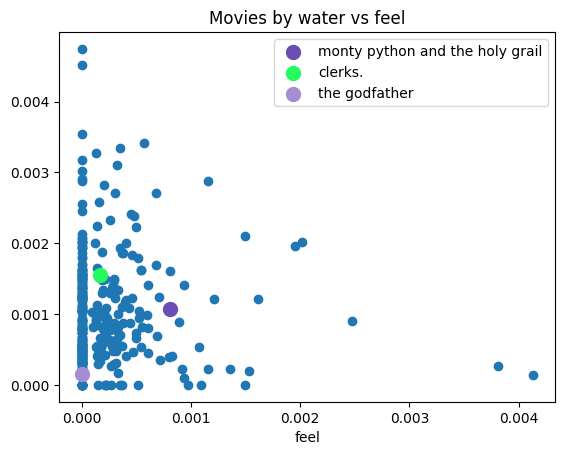

In [ ]:
def display_water_feel(tests: list):
  water = movies['water']
  feel = movies['feel']
  plt.scatter(water, feel)

  for title in tests:
    movie = movies[movies['Title'] == title]
    movie_water = movie['water']
    movie_feel = movie['feel']
    plt.scatter(movie_water, movie_feel, s=100, color=np.random.rand(3,), label=title)
    plt.title('Movies by water vs feel')
    plt.xlabel('water')
    plt.xlabel('feel')

  plt.legend()
  plt.show()

display_water_feel(['monty python and the holy grail', 'clerks.', 'the godfather'])

In [ ]:
"""
Manual for above function
water = movies['water']
feel = movies['feel']

monty = movies[movies['Title'] == 'monty python and the holy grail']
monty_water = monty['water']
monty_feel = monty['feel']

clerks = movies[movies['Title'] == 'clerks.']
clerks_water = clerks['water']
clerks_feel = clerks['feel']

godfather = movies[movies['Title'] == 'the godfather']
godfather_water = godfather['water']
godfather_feel = godfather['feel']

plt.scatter(water, feel)
plt.scatter(monty_water, monty_feel, s=100, color='red', label='monty')
plt.scatter(clerks_water, clerks_feel, s=100, color='purple', label='clerks')
plt.scatter(godfather_water, godfather_feel, s=100, color='pink', label='godfather')
plt.legend()
plt.show()
"""

"\nManual for above function\nwater = movies['water']\nfeel = movies['feel']\n\nmonty = movies[movies['Title'] == 'monty python and the holy grail']\nmonty_water = monty['water']\nmonty_feel = monty['feel']\n\nclerks = movies[movies['Title'] == 'clerks.']\nclerks_water = clerks['water']\nclerks_feel = clerks['feel']\n\ngodfather = movies[movies['Title'] == 'the godfather']\ngodfather_water = godfather['water']\ngodfather_feel = godfather['feel']\n\nplt.scatter(water, feel)\nplt.scatter(monty_water, monty_feel, s=100, color='red', label='monty')\nplt.scatter(clerks_water, clerks_feel, s=100, color='purple', label='clerks')\nplt.scatter(godfather_water, godfather_feel, s=100, color='pink', label='godfather')\nplt.legend()\nplt.show()\n"

In [ ]:
def distance_water_and_feel(title1: str, title2: str):
  movie1 = movies[movies['Title'] == title1]
  movie2 = movies[movies['Title'] == title2]

  movie1_water = movie1['water'].iloc[0]
  movie2_water = movie2['water'].iloc[0]

  movie1_feel = movie1['feel'].iloc[0]
  movie2_feel = movie2['feel'].iloc[0]

  return np.sqrt((movie2_water - movie1_water) ** 2 + (movie2_feel - movie1_feel) ** 2)

print(distance_water_and_feel('monty python and the holy grail', 'clerks.'))

0.000798381068723


In [ ]:
def distance_two_features(title1: str, title2: str, feature1: str, feature2: str):
  movie1 = movies[movies['Title'] == title1]
  movie2 = movies[movies['Title'] == title2]

  movie1_f1 = movie1[feature1].iloc[0]
  movie2_f1 = movie2[feature1].iloc[0]

  movie1_f2 = movie1[feature2].iloc[0]
  movie2_f2 = movie2[feature2].iloc[0]

  return np.sqrt((movie2_f2 - movie1_f2) ** 2 + (movie2_f1 - movie1_f1) ** 2)

print(distance_two_features('monty python and the holy grail', 'the godfather', 'water', 'feel'))
print(distance_two_features('monty python and the holy grail', 'clerks.', 'water', 'feel'))
print(distance_two_features('monty python and the holy grail', 'the silence of the lambs', 'water', 'feel'))

0.00122252091513
0.000798381068723
0.000222563148556


In [ ]:
def find_5_closest_movies(title1: str, feature1: str, feature2: str):
  distances = [{'Title': movie['Title'],
                'Genre': movie['Genre'],
                feature1: movie['water'],
                feature2: movie['feel'],
                'Distance': distance_two_features(title1, movie['Title'], feature1, feature2)}
               for _, movie in movies.iterrows()]
  closest_5 = pd.DataFrame(distances)
  closest_5.sort_values(by='Distance', inplace=True, ascending=True)
  return closest_5.iloc[1:6]

close_movies = find_5_closest_movies('monty python and the holy grail', 'water', 'feel')
close_movies

,Title,Genre,water,feel,Distance
256,alien,thriller,0.000709,0.001241,0.000194
72,tomorrow never dies,thriller,0.000889,0.000889,0.000202
225,the silence of the lambs,thriller,0.000596,0.000993,0.000223
53,innerspace,comedy,0.000522,0.001044,0.000283
274,some like it hot,comedy,0.000529,0.000951,0.000301


In [ ]:
def most_common(label, table):
    return table.group(label).sort('count', descending=True).column(label).item(0)
most_common('Genre', Table.from_df(close_movies))

'thriller'

In [ ]:
def distance(arr1, arr2):
  return np.sqrt(np.sum((arr1 - arr2) ** 2))

movie1_features = train_movies.iloc[0, 5:]
movie2_features = train_movies.iloc[1, 5:]

dist = distance(movie1_features, movie2_features)
print(dist)

0.0333544689088


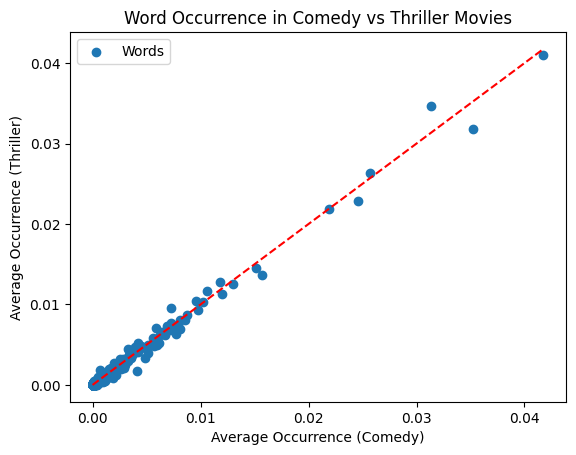

In [ ]:
thriller_words = []
comedy_words = []

thriller_movies = movies[movies['Genre'] == 'thriller']
comedy_movies = movies[movies['Genre'] == 'comedy']

thriller_avg = thriller_movies.iloc[:, 5:].mean()
comedy_avg = comedy_movies.iloc[:, 5:].mean()

plt.scatter(comedy_avg, thriller_avg, label='Words')

max_val = max(max(comedy_avg), max(thriller_avg))
plt.plot([0, max_val], [0, max_val], 'r--')

for word, x, y in zip(thriller_avg.index, comedy_avg, thriller_avg):
    if x - y > 0.001:
      comedy_words.append(word)
    if y - x > 0.001:
      thriller_words.append(word)

plt.xlabel('Average Occurrence (Comedy)')
plt.ylabel('Average Occurrence (Thriller)')
plt.title('Word Occurrence in Comedy vs Thriller Movies')

plt.legend()
plt.show()

In [ ]:
print(thriller_words)
print(comedy_words)

['there', 'kill', 'wa', 'he', 'the', 'him', 'in']
['so', 'and', 'im', 'my', 'well', 'a', 'i', 'oh']


In [ ]:
thriller_words.append('cop')
thriller_words.append('murder')
thriller_words.append('gun')

comedy_words.append('to')
comedy_words.append('realli')

In [ ]:
print(thriller_words)
print(comedy_words)

['there', 'kill', 'wa', 'he', 'the', 'him', 'in', 'cop', 'murder', 'gun']
['so', 'and', 'im', 'my', 'well', 'a', 'i', 'oh', 'to', 'realli']


In [ ]:
def fast_distances(test_row, train_table):
    """Return an array of the distances between test_row and each row in train_table.

    Takes 2 arguments:
      test_row: A row of a table containing features of one
        test movie (e.g., test_my_features.row(0)).
      train_table: A table of features (for example, the whole
        table train_my_features)."""
    assert train_table.num_columns < 50, "Make sure you're not using all the features of the movies table."
    assert type(test_row) != tables.Table, "Make sure you are passing in a row object to fast_distances."
    assert len(test_row) == len(train_table.row(0)), "Make sure the length of test row is the same as the length of a row in train_table."
    counts_matrix = np.asmatrix(train_table.columns).transpose()
    diff = np.tile(np.array(list(test_row)), [counts_matrix.shape[0], 1]) - counts_matrix
    np.random.seed(0) # For tie breaking purposes
    distances = np.squeeze(np.asarray(np.sqrt(np.square(diff).sum(1))))
    eps = np.random.uniform(size=distances.shape)*1e-10 #Noise for tie break
    distances = distances + eps
    return distances

In [ ]:
my_features = make_array('i', 'the', 'to', 'a', 'it', 'and', 'that', 'of', 'your', 'what', 'in', 'me', 'is', 'do', 'thi', 'dont', 'he', 'for', 'know')
test_row = Table.from_df(movies[my_features]).row(0)
train_table = Table.from_df(train_movies[my_features])

first_movie_differences = fast_distances(test_row, train_table)

In [ ]:
genre_and_distances = Table().with_columns('Genre', train_movies['Genre'],'distance', first_movie_differences)
genre_and_distances.where(genre_and_distances['Genre'] == 'comedy').num_rows

102

In [ ]:
sorted_genres = genre_and_distances.sort('distance')
nearest_7 = sorted_genres.take(range(7))
predict_genre = most_common('Genre', nearest_7)
predict_genre

'comedy'

In [ ]:
def classify(test_row, train_features_table, train_labels_array, k=7):
    distances = fast_distances(test_row, train_features_table)
    genre_and_distances = Table().with_columns(
        'Genre', train_labels_array,
        'Distance', distances
    )
    nearest_k = genre_and_distances.sort('Distance').take(range(k))
    return most_common('Genre', nearest_k)

In [ ]:
train_table = Table.from_df(train_movies[my_features])
train_labels = list(train_movies['Genre'])
godzilla_row = test_movies[test_movies['Title'] == 'godzilla'][my_features].iloc[0]
godzilla_genre = classify(godzilla_row, train_table, train_labels, k=15)
print("Predicted genre for Godzilla:", godzilla_genre)

Predicted genre for Godzilla: thriller


In [ ]:
test_table = Table.from_df(test_movies[my_features])

guesses = []
actuals = list(test_movies['Genre'])

for i in range(test_table.num_rows):
  test_row = test_table.row(i)
  guess = classify(test_row, train_table, train_labels, k=15)
  guesses.append(guess)

correct_guess = []
for i in range(len(guesses)):
  guess = guesses[i]
  actual = actuals[i]
  if guess == actual:
    correct_guess.append(True)
  else:
    correct_guess.append(False)

proportion_correct = sum(correct_guess) / len(guesses)
proportion_correct

0.72

In [ ]:
test_movie_correctness = Table.from_df(test_movies).select('Title', 'Genre')
test_movie_correctness['Was correct'] = correct_guess
test_movie_correctness

Title,Genre,Was correct
ghostbusters ii,comedy,True
intolerable cruelty,comedy,True
psycho,thriller,False
book of shadows: blair witch 2,thriller,True
the getaway,thriller,False
broadcast news,comedy,True
mission: impossible,thriller,True
meet john doe,comedy,False
arctic blue,thriller,True
the world is not enough,thriller,True


In [ ]:
thriller_movies = test_movie_correctness.where(test_movie_correctness['Genre'] == 'thriller')
comedy_movies = test_movie_correctness.where(test_movie_correctness['Genre'] == 'comedy')

num_thriller_movies = thriller_movies.num_rows
num_comedy_movies = comedy_movies.num_rows

num_right_thriller_movies = thriller_movies.where('Was correct', True).num_rows
num_right_comedy_movies = comedy_movies.where('Was correct', True).num_rows
num_wrong_thriller_movies = thriller_movies.where('Was correct', False).num_rows
num_wrong_comedy_movies = comedy_movies.where('Was correct', False).num_rows

print('Proportion of correctly classified thriller movies:', round(num_right_thriller_movies / num_thriller_movies, 2))
print('Proportion of correctly classified comedy movies:', round(num_right_comedy_movies / num_comedy_movies, 2))
print('Proportion of incorrectly classified thriller movies:', round(num_wrong_thriller_movies / num_thriller_movies, 2))
print('Proportion of incorrectly classified comedy movies:', round(num_wrong_comedy_movies / num_comedy_movies, 2))

Proportion of correctly classified thriller movies: 0.7
Proportion of correctly classified comedy movies: 0.76
Proportion of incorrectly classified thriller movies: 0.3
Proportion of incorrectly classified comedy movies: 0.24
